# 2010-2019 Fall Marathons in USA

Data Source: Brian Rock's kaggle account
Referance: https://www.kaggle.com/datasets/runningwithrock/2010-2019-fall-marathons

About Dataset:

This dataset includes the individual finisher results from a sample of fall marathons in the United States, 
covering the period 2010 to 2019. The results for each finisher include their name, gender, age, and finish time, 
along with the year and the name of the race. 
The dataset includes approximately 2,000,000 individual results across 100 different races.
I initially collected this dataset as part of an analysis I did on age grading marathon results. 
This analysis led to the creation of this age grading calculator based on percentiles.
The parameters for inclusion into the sample were that the marathon took place in the United States 
in September, October, or November, and that there were at least 500 finishers. I selected these months to reduce 
the chances that a runner would participate in two marathons in the same year and because they are popular months 
for racing in the United States. While the floor of 500 finishers reduced the total number of races to be included in 
the sample, it did not appreciably reduce the number of finishers.
I would consider the resulting sample to be fairly representative of American marathons as a whole throughout 
the period 2010 to 2019.
In the future, I may revise this dataset to include 
a) the dates, times, and locations of each race and 
b) the weather on each race day.


 #### Importing required liabraries

In [1]:
# Importing required liabraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import warnings
warnings.filterwarnings ('ignore')

In [2]:
# Open dataset

df = pd.read_csv ('Results.csv')
df.head()

,Race,Year,Name,Gender,Age,Finish,Age Bracket
0,Columbus Marathon,2015,Becky Williams,F,29,13645,Under 35
1,Columbus Marathon,2015,Jessica Sheahan,F,27,13648,Under 35
2,Columbus Marathon,2015,Kelsey Stief,F,27,13650,Under 35
3,Columbus Marathon,2015,Mehgan Cline,F,26,13650,Under 35
4,Columbus Marathon,2015,Stefanie Driesenga,F,28,13652,Under 35


#### Basic Data check

In [3]:
df.shape

(2053366, 7)

- Dataset has indivisual 2053366 records and 7 columns

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2053366 entries, 0 to 2053365
Data columns (total 7 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   Race         object
 1   Year         int64 
 2   Name         object
 3   Gender       object
 4   Age          int64 
 5   Finish       int64 
 6   Age Bracket  object
dtypes: int64(3), object(4)
memory usage: 109.7+ MB


In [5]:
df.describe()

,Year,Age,Finish
count,2.053366e+06,2.053366e+06,2.053366e+06
mean,2.014416e+03,3.919313e+01,1.651780e+04
std,2.833053e+00,1.207902e+01,3.366605e+03
min,2.010000e+03,-9.000000e+00,7.425000e+03
25%,2.012000e+03,3.100000e+01,1.408000e+04
50%,2.014000e+03,3.900000e+01,1.613500e+04
75%,2.017000e+03,4.800000e+01,1.855300e+04
max,2.019000e+03,1.160000e+02,7.346000e+04


In [6]:
# Dataset null values

df.isna().sum()

Race           0
Year           0
Name           2
Gender         8
Age            0
Finish         0
Age Bracket    0
dtype: int64

#### Filling Null values

In [7]:
# finding mode value for gender before filling null
gender_mode= df.Gender.mode()[0]
gender_mode

'M'

In [8]:
# Filling Null values using mode 

df['Gender']= df['Gender'].fillna(gender_mode)

In [9]:
# Filling Name with 'Unknown'

df['Name'] = df['Name'].fillna('Unknown')

In [10]:
# Confirming Dataset 0 null values

df.isna().sum()

Race           0
Year           0
Name           0
Gender         0
Age            0
Finish         0
Age Bracket    0
dtype: int64

#### Checking Duplicate rows

In [11]:
#Checking Duplicate rows

df_copy = df.copy()
df_copy.drop_duplicates()
df.head()

,Race,Year,Name,Gender,Age,Finish,Age Bracket
0,Columbus Marathon,2015,Becky Williams,F,29,13645,Under 35
1,Columbus Marathon,2015,Jessica Sheahan,F,27,13648,Under 35
2,Columbus Marathon,2015,Kelsey Stief,F,27,13650,Under 35
3,Columbus Marathon,2015,Mehgan Cline,F,26,13650,Under 35
4,Columbus Marathon,2015,Stefanie Driesenga,F,28,13652,Under 35


In [12]:
# Checking Shape of the data after removing duplicate, but no duplicate found
df.shape

(2053366, 7)

#### Converting second time to hh:mm:ss

In [13]:
# function second time to hh:mm:ss

def conv_hms (seconds):
    hours = seconds // 3600
    minutes = (seconds % 3600) // 60
    seconds = seconds % 60
    return f"{int(hours):02}: {int(minutes):02}: {int(seconds):02}"

# Applying the above function on dataset> 'Finish'
df['Time_HMS'] = df['Finish'].apply(conv_hms)

In [14]:
# Df with new column Time_HMS
df.head()

,Race,Year,Name,Gender,Age,Finish,Age Bracket,Time_HMS
0,Columbus Marathon,2015,Becky Williams,F,29,13645,Under 35,03: 47: 25
1,Columbus Marathon,2015,Jessica Sheahan,F,27,13648,Under 35,03: 47: 28
2,Columbus Marathon,2015,Kelsey Stief,F,27,13650,Under 35,03: 47: 30
3,Columbus Marathon,2015,Mehgan Cline,F,26,13650,Under 35,03: 47: 30
4,Columbus Marathon,2015,Stefanie Driesenga,F,28,13652,Under 35,03: 47: 32


#### EDA

In [15]:
# finding percentage value for gender

df['Gender'].value_counts(normalize=True)*100

Gender
M    56.383421
F    43.616579
Name: proportion, dtype: float64

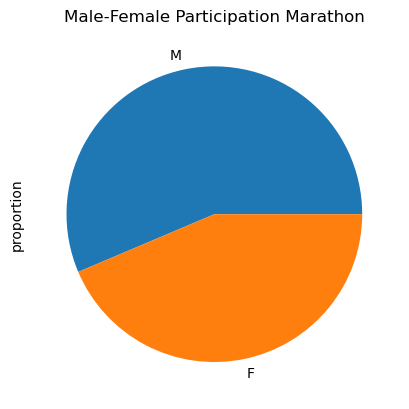

In [16]:
gend_mf =df['Gender'].value_counts(normalize=True)*100
gend_mf.plot.pie()
plt.title('Male-Female Participation Marathon')
plt.show()

Text(0.5, 1.0, 'Year-wise Frequency of Participants')

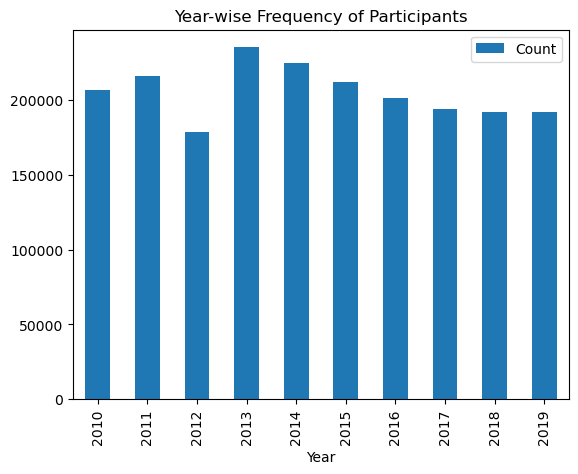

In [17]:
# Data percentage year wise
year_count= df.Year.value_counts()
year_count = year_count.reset_index()
year_count.columns=['Year', 'Count']
year_count = year_count.sort_values(by='Year')    
year_count.plot.bar(x='Year')
plt.title('Year-wise Frequency of Participants')

In [18]:
df.head()

,Race,Year,Name,Gender,Age,Finish,Age Bracket,Time_HMS
0,Columbus Marathon,2015,Becky Williams,F,29,13645,Under 35,03: 47: 25
1,Columbus Marathon,2015,Jessica Sheahan,F,27,13648,Under 35,03: 47: 28
2,Columbus Marathon,2015,Kelsey Stief,F,27,13650,Under 35,03: 47: 30
3,Columbus Marathon,2015,Mehgan Cline,F,26,13650,Under 35,03: 47: 30
4,Columbus Marathon,2015,Stefanie Driesenga,F,28,13652,Under 35,03: 47: 32


In [19]:
# Unique races 
df.Race.nunique()

96

In [20]:
# Top 10 races by data count all years (2010-2019)
top_10_races= df.Race.value_counts()
top_10_races.head(10).reset_index()

,Race,count
0,NYC Marathon,450347
1,Chicago Marathon,401560
2,Marine Corps Marathon,211716
3,Philadelphia Marathon,97566
4,Twin Cities Marathon,81767
5,St. George Marathon,52275
6,Portland Marathon,48888
7,Columbus Marathon,43702
8,Richmond Marathon,43333
9,Indianapolis Monumental Marathon,37518


In [21]:
# Age category
age = df.Age.value_counts()
age

Age
 39     142473
 34     137601
 29     134031
 44     129008
 49     101558
         ...  
 2           2
 116         1
 94          1
 7           1
-9           1
Name: count, Length: 96, dtype: int64

In [22]:
# There is -1 values in dataet, that represents the Age value not available

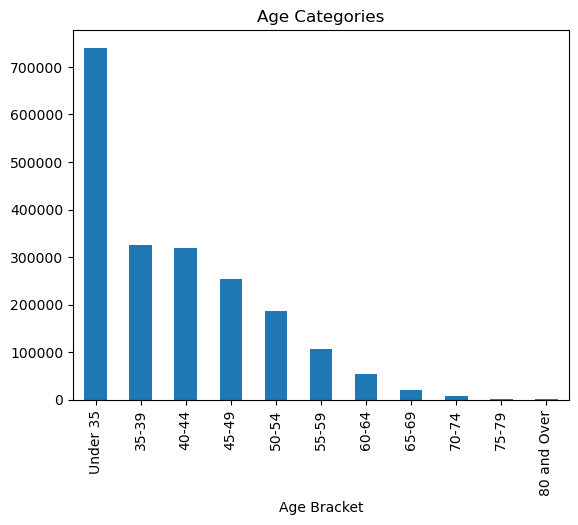

In [23]:
age_categories= df[df.Age>0]
age_categories['Age Bracket'].value_counts().plot.bar()
plt.title('Age Categories')
plt.show()

#### Finish by Gender


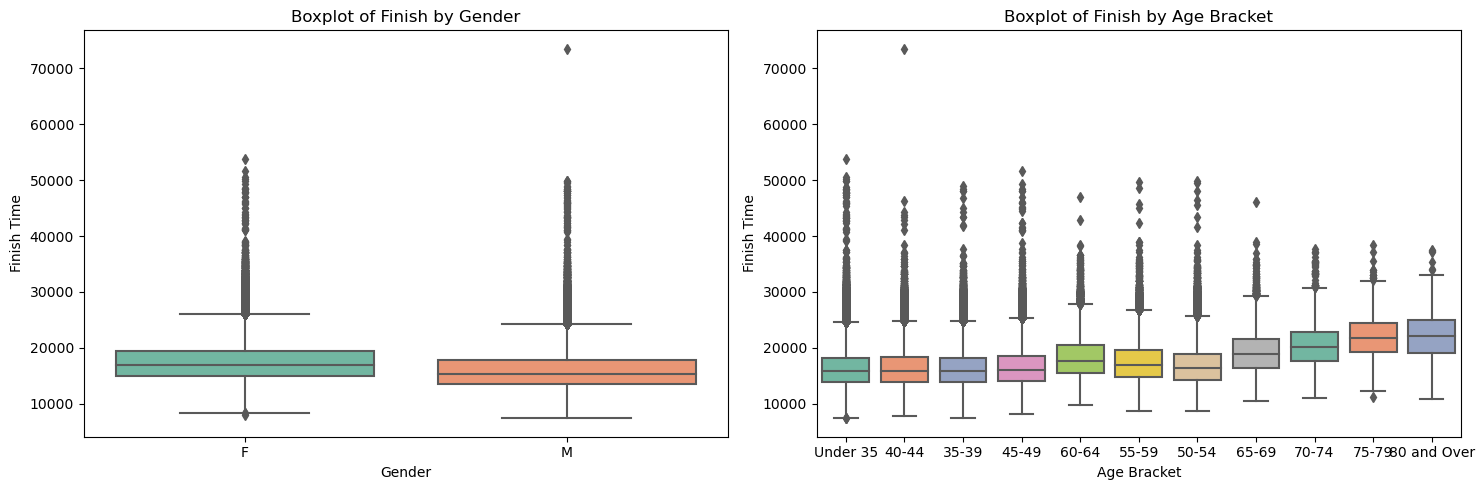

In [96]:
# First subplot: Boxplot of Finish by Gender
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='Gender', y='Finish', palette='Set2')
plt.title('Boxplot of Finish by Gender')
plt.xlabel('Gender')
plt.ylabel('Finish Time')

# Second subplot: Boxplot of Finish by Age Bracket 
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='Age Bracket', y='Finish', palette='Set2')
plt.title('Boxplot of Finish by Age Bracket')
plt.xlabel('Age Bracket')
plt.ylabel('Finish Time')

plt.tight_layout()
plt.show()

#### Top 10 (Male & Female) Player by finish timing USA (2010-2019)

In [24]:
#Top 10 (Male & Female) Player by finish timing USA (2010-2019)

df.sort_values(by='Finish').head(10)

,Race,Year,Name,Gender,Age,Finish,Age Bracket,Time_HMS
1092564,Chicago Marathon,2013,Dennis Kimetto,M,29,7425,Under 35,02: 03: 45
1092565,Chicago Marathon,2013,Emannuel Mutai,M,29,7432,Under 35,02: 03: 52
1230265,Chicago Marathon,2014,Eliud Kipchoge,M,29,7451,Under 35,02: 04: 11
1230266,Chicago Marathon,2014,Sammy Kitwara,M,29,7468,Under 35,02: 04: 28
1230267,Chicago Marathon,2014,Dickson Chumba,M,29,7472,Under 35,02: 04: 32
949317,Chicago Marathon,2012,Tsegaye Kebede,M,29,7478,Under 35,02: 04: 38
949318,Chicago Marathon,2012,Feyisa Lilesa,M,24,7492,Under 35,02: 04: 52
1601396,NYC Marathon,2011,Geoffrey Mutai,M,30,7506,Under 35,02: 05: 06
1036440,Chicago Marathon,2018,Mo Farah,M,39,7511,35-39,02: 05: 11
1092566,Chicago Marathon,2013,Sammy Kitwara,M,29,7516,Under 35,02: 05: 16


In all fall marathon data in USA (2010-2019), player finished their race  before  02:05:16

In [25]:
#Top 10 (Female) Player by finish timing USA (2010-2019)
df[df['Gender']=='F'].sort_values(by='Finish').head(10)

,Race,Year,Name,Gender,Age,Finish,Age Bracket,Time_HMS
1260164,Chicago Marathon,2019,Brigid Kosgei,F,29,8044,Under 35,02: 14: 04
924525,Chicago Marathon,2017,Tirunesh Dibaba,F,34,8311,Under 35,02: 18: 31
1031440,Chicago Marathon,2018,Brigid Kosgei,F,24,8315,Under 35,02: 18: 35
1123956,Chicago Marathon,2013,Rita Jeptoo,F,34,8397,Under 35,02: 19: 57
924526,Chicago Marathon,2017,Brigid Kosgei,F,24,8422,Under 35,02: 20: 22
1123957,Chicago Marathon,2013,Jemima Sumgong Jelegat,F,29,8448,Under 35,02: 20: 48
1260165,Chicago Marathon,2019,Ababel Yeshaneh,F,29,8451,Under 35,02: 20: 51
1260166,Chicago Marathon,2019,Gelete Burka,F,34,8455,Under 35,02: 20: 55
924527,Chicago Marathon,2017,Jordan Hasay,F,29,8457,Under 35,02: 20: 57
1031441,Chicago Marathon,2018,Roza Dereje,F,24,8478,Under 35,02: 21: 18


In all fall marathon data in USA (2010-2019), Female player finished their race before 02:21:18

#### Top Player in Top marathon Year wise: NYC Marathon

In [26]:
# Filtered data with only NYC Marathon
NYC = df[df.Race== 'NYC Marathon']
NYC_Male = NYC[NYC.Gender== 'M']
NYC_Female = NYC[NYC.Gender== 'F']

# Yearwise top Male player each year
NYC_Male_p = NYC_Male.pivot_table(index=['Year','Race', 'Name', 'Time_HMS'], values= 'Finish' )
NYC_Male_p

Finish
Year Race         Name               Time_HMS          
2010 NYC Marathon Aad Buis           04: 38: 00   16680
                  Aad Huurman        04: 08: 52   14932
                  Aad van Oosten     04: 50: 42   17442
                  Aad van der Lans   04: 28: 26   16106
                  Aad van der Velden 04: 30: 42   16242
...                                                 ...
2019 NYC Marathon Ángel Llorente     04: 22: 13   15733
                  Íñigo González     03: 49: 32   13772
                  Øystein Tuntland   05: 02: 17   18137
                  Łukasz Im          03: 18: 50   11930
                  Łukasz Naczas      04: 00: 47   14447

[268926 rows x 1 columns]

In [27]:
# Sort the DataFrame by Year and Finish
NYC_Male_p = NYC_Male_p.sort_values(by=['Year', 'Finish'])

# Group by 'Year' and take the top 3 players per year
NYC_Male_top3 = NYC_Male_p.groupby('Year').head(3)

NYC_Male_top3

Finish
Year Race         Name                  Time_HMS          
2010 NYC Marathon Gebre Gebrmariam      02: 08: 14    7694
                  Emmanuel Mutai        02: 09: 18    7758
                  Moses Kigen Kipkosgei 02: 10: 39    7839
2011 NYC Marathon Geoffrey Mutai        02: 05: 06    7506
                  Emmanuel Mutai        02: 06: 28    7588
                  Tsegaye Kebede        02: 07: 14    7634
2013 NYC Marathon Geoffrey Mutai        02: 08: 24    7704
                  Tsegaye Kebede        02: 09: 15    7755
                  Lusapho April         02: 09: 45    7785
2014 NYC Marathon Wilson Kipsang        02: 10: 59    7859
                  Lelisa Desisa Benti   02: 11: 06    7866
                  Gebre Gebremariam     02: 12: 13    7933
2015 NYC Marathon Stanley Biwott        02: 10: 34    7834
                  Geoffery Kamworor     02: 10: 48    7848
                  Lelisa Desisa         02: 12: 10    7930
2016 NYC Marathon Ghirmay Ghebreslassie 02: 07: 51    7671
                  Lucas Rotich          02: 08: 53    7733
                  Abdi Abdirahman       02: 11: 23    7883
2017 NYC Marathon Geoffrey Kamworor     02: 10: 53    7853
                  Wilson Kipsang        02: 10: 56    7856
                  Lelisa Desisa         02: 11: 32    7892
2018 NYC Marathon Lelisa Desisa         02: 05: 59    7559
                  Shura Kitata          02: 06: 01    7561
                  Geoffrey Kamworor     02: 06: 26    7586
2019 NYC Marathon Geoffrey Kamworor     02: 08: 13    7693
                  Albert Korir          02: 08: 36    7716
                  Girma Bekele Gebre    02: 08: 38    7718

In [28]:
# Yearwise top Female player each year
NYC_Female_p = NYC_Female.pivot_table(index=['Year','Race', 'Name', 'Time_HMS'], values= 'Finish' )
# Sort the DataFrame by Year and Finish
NYC_Female_p = NYC_Female_p.sort_values(by=['Year', 'Finish'])

# Group by 'Year' and take the top 3 players per year
NYC_Female_top3 = NYC_Female_p.groupby('Year').head(3)

NYC_Female_top3

Finish
Year Race         Name                Time_HMS          
2010 NYC Marathon Edna Kiplagat       02: 28: 20    8900
                  Shalane Flanagan    02: 28: 40    8920
                  Mary Keitany        02: 29: 01    8941
2011 NYC Marathon Firehiwot Dado      02: 23: 15    8595
                  Buzunesh Deba       02: 23: 19    8599
                  Mary Keitany        02: 23: 38    8618
2013 NYC Marathon Priscah Jeptoo      02: 25: 07    8707
                  Buzunesh Deba       02: 25: 56    8756
                  Jelena Prokopcuka   02: 27: 47    8867
2014 NYC Marathon Mary Keitany        02: 25: 07    8707
                  Jemima Sumgong      02: 25: 10    8710
                  Sara Moreira        02: 26: 00    8760
2015 NYC Marathon Mary Keitany        02: 24: 25    8665
                  Aselefech Mergia    02: 25: 32    8732
                  Tigist Tufa         02: 25: 50    8750
2016 NYC Marathon Mary Keitany        02: 24: 26    8666
                  Sally Kipyego       02: 28: 01    8881
                  Molly Huddle        02: 28: 13    8893
2017 NYC Marathon Shalane Flanagan    02: 26: 53    8813
                  Mary Keitany        02: 27: 54    8874
                  Mamitu Daska        02: 28: 08    8888
2018 NYC Marathon Mary Keitany        02: 22: 48    8568
                  Vivian Cheruiyot    02: 26: 02    8762
                  Shalane Flanagan    02: 26: 22    8782
2019 NYC Marathon Joyciline Jepkosgei 02: 22: 38    8558
                  Mary Keitany        02: 23: 32    8612
                  Ruti Aga            02: 25: 51    8751

In [29]:
df.head()

,Race,Year,Name,Gender,Age,Finish,Age Bracket,Time_HMS
0,Columbus Marathon,2015,Becky Williams,F,29,13645,Under 35,03: 47: 25
1,Columbus Marathon,2015,Jessica Sheahan,F,27,13648,Under 35,03: 47: 28
2,Columbus Marathon,2015,Kelsey Stief,F,27,13650,Under 35,03: 47: 30
3,Columbus Marathon,2015,Mehgan Cline,F,26,13650,Under 35,03: 47: 30
4,Columbus Marathon,2015,Stefanie Driesenga,F,28,13652,Under 35,03: 47: 32


In [30]:
avg_finishtime= df.groupby('Age Bracket')['Finish'].mean().reset_index()
avg_finishtime

,Age Bracket,Finish
0,35-39,16252.765268
1,40-44,16353.601433
2,45-49,16553.828213
3,50-54,16862.138297
4,55-59,17413.515715
5,60-64,18132.250225
6,65-69,19120.808675
7,70-74,20374.313843
8,75-79,21892.317949
9,80 and Over,22188.393829


In [31]:
# Applying the above function on dataset> 'Finish'
avg_finishtime['Time_HMS'] = avg_finishtime['Finish'].apply(conv_hms)

In [32]:
# Avg finish time in H:M:S
avg_finishtime

,Age Bracket,Finish,Time_HMS
0,35-39,16252.765268,04: 30: 52
1,40-44,16353.601433,04: 32: 33
2,45-49,16553.828213,04: 35: 53
3,50-54,16862.138297,04: 41: 02
4,55-59,17413.515715,04: 50: 13
5,60-64,18132.250225,05: 02: 12
6,65-69,19120.808675,05: 18: 40
7,70-74,20374.313843,05: 39: 34
8,75-79,21892.317949,06: 04: 52
9,80 and Over,22188.393829,06: 09: 48


In [33]:
df.head()

,Race,Year,Name,Gender,Age,Finish,Age Bracket,Time_HMS
0,Columbus Marathon,2015,Becky Williams,F,29,13645,Under 35,03: 47: 25
1,Columbus Marathon,2015,Jessica Sheahan,F,27,13648,Under 35,03: 47: 28
2,Columbus Marathon,2015,Kelsey Stief,F,27,13650,Under 35,03: 47: 30
3,Columbus Marathon,2015,Mehgan Cline,F,26,13650,Under 35,03: 47: 30
4,Columbus Marathon,2015,Stefanie Driesenga,F,28,13652,Under 35,03: 47: 32


### Checking Relation between Age and Finish Time

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2053366 entries, 0 to 2053365
Data columns (total 8 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   Race         object
 1   Year         int64 
 2   Name         object
 3   Gender       object
 4   Age          int64 
 5   Finish       int64 
 6   Age Bracket  object
 7   Time_HMS     object
dtypes: int64(3), object(5)
memory usage: 125.3+ MB


In [35]:
# filtering Age > 0
df_age_fil= df[df.Age>0]

# Making Sample data of 5%
df_sample = df_age_fil.sample (frac=0.05, random_state=42)

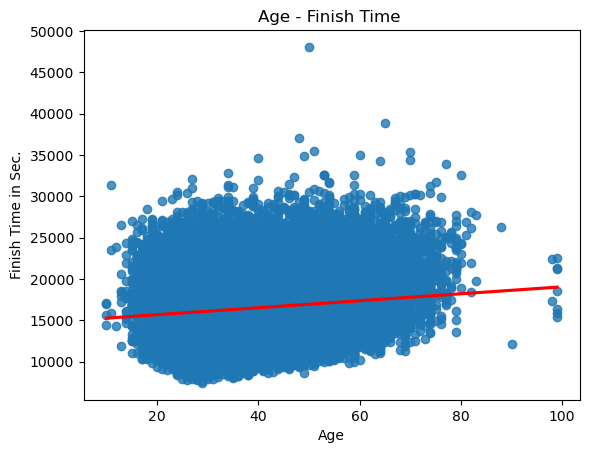

In [36]:
# Using Regression checking Age and timming relation

sns.regplot (data=df_sample, x='Age', y='Finish', line_kws={'color':'red'})
plt.title ('Age - Finish Time ')
plt.ylabel ('Finish Time in Sec.')
plt.show()

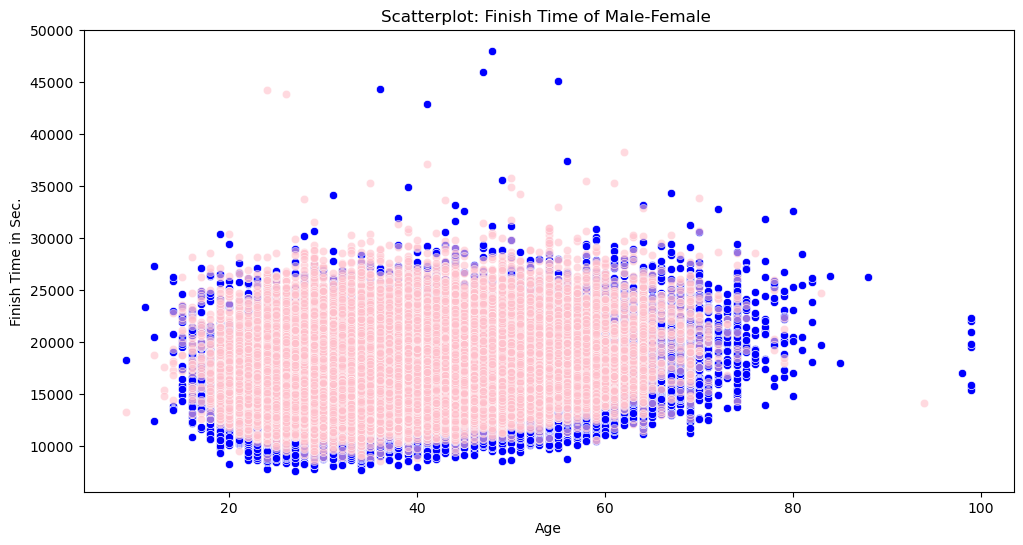

In [60]:
# Checking same above data in male female
plt.figure(figsize=(12, 6))

df_age_fil_m = df_age_fil[df_age_fil.Gender=='M'].sample(frac=0.05, random_state= 42)
df_age_fil_f = df_age_fil[df_age_fil.Gender=='F'].sample(frac=0.05, random_state= 42)

sns.scatterplot(data=df_age_fil_m, x= 'Age', y='Finish', color= 'blue')
sns.scatterplot(data=df_age_fil_f, x= 'Age', y='Finish', color='pink', alpha= 0.6)
plt.ylabel('Finish Time in Sec.')
plt.title('Scatterplot: Finish Time of Male-Female ')
plt.show()

#### Observation:
- No clear differance male - female data
- Observing Change of finish time and Age in below 10000 sec.

#### Finding Correlation between Age to Finish Time <10000 sec. (2 hours, 46 minutes, and 40 seconds)

In [38]:
# Filtering data < 10000 sec. to know detailed finish time differances

df_10k = df_age_fil[df_age_fil.Finish<10000]

In [39]:
# Male-Female separate dataframe

df_10k_m = df_10k[df_10k.Gender== 'M']
df_10k_f = df_10k[df_10k.Gender== 'F']

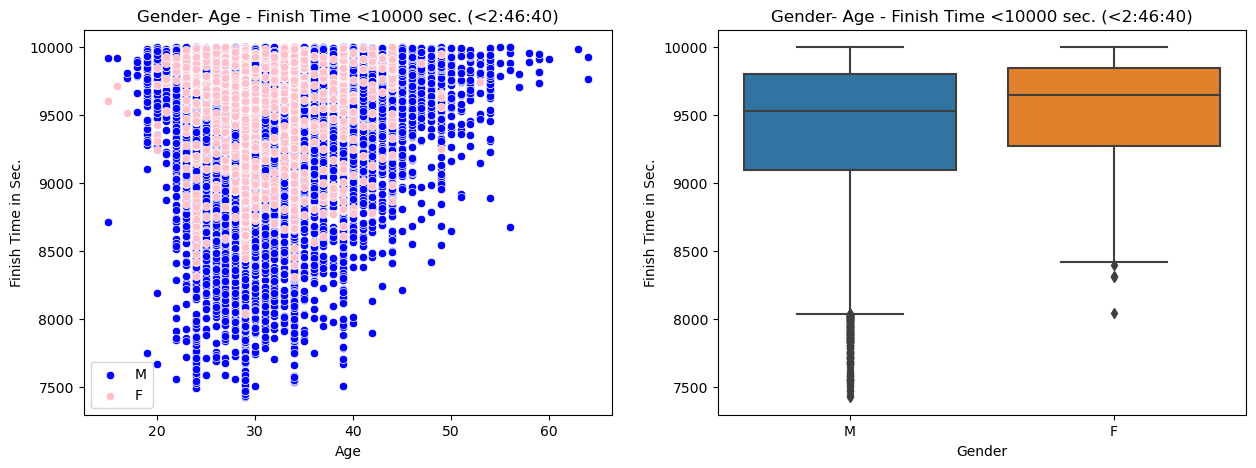

In [40]:
# Subplot of Gender- Age - Finish Time <10000 sec. (<2:46:40)
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.scatterplot (data=df_10k_m, x='Age', y='Finish',  color='blue', label= 'M')
sns.scatterplot (data=df_10k_f, x='Age', y='Finish',  color= 'pink', label= 'F')
plt.title('Gender- Age - Finish Time <10000 sec. (<2:46:40)')
plt.ylabel('Finish Time in Sec.')

plt.subplot(1,2,2)
sns.boxplot(data=df_10k, x='Gender', y='Finish')
plt.title('Gender- Age - Finish Time <10000 sec. (<2:46:40)')
plt.ylabel('Finish Time in Sec.')
plt.show()

#### After Age of 40 very few female participent obsering their Finish Time <10000 sec. (<2:46:40)

In [41]:
# <10000 sec & Age greater than 40  >>>>  To know After 40 age which gender type is trying for win race
df_10k_gr_than40= df_10k[df_10k.Age>40]

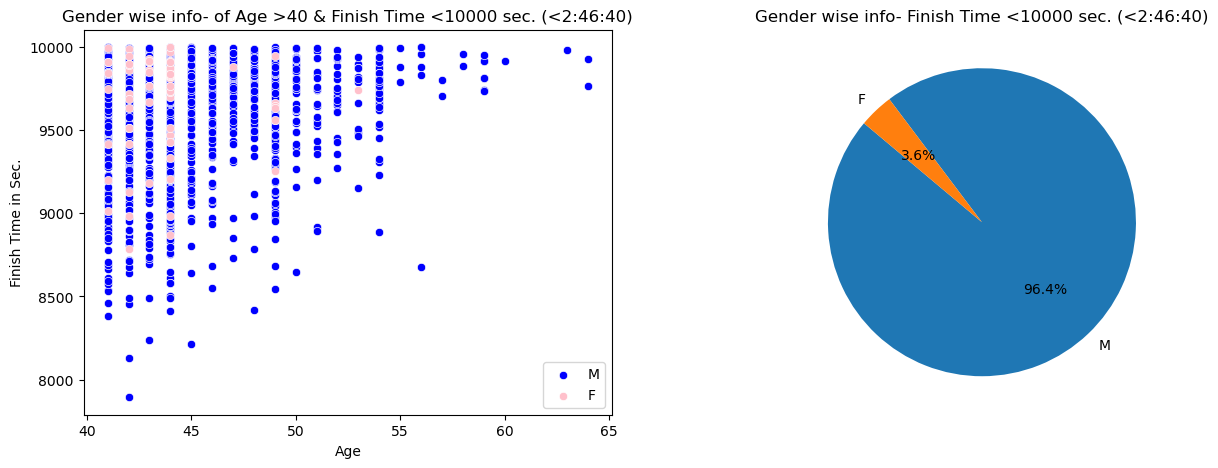

In [82]:
# Subplot of After Age 40 - Gender- Age - Finish Time <10000 sec. (<2:46:40)
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.scatterplot (data=df_10k_gr_than40[df_10k_gr_than40.Gender== 'M'], x='Age', y='Finish',  color='blue', label= 'M')
sns.scatterplot (data=df_10k_gr_than40[df_10k_gr_than40.Gender== 'F'], x='Age', y='Finish',  color= 'pink', label= 'F')
plt.title('Gender wise info- of Age >40 & Finish Time <10000 sec. (<2:46:40)')
plt.ylabel('Finish Time in Sec.')

plt.subplot(1,2,2)
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Gender wise info- Finish Time <10000 sec. (<2:46:40)')
plt.show()

#### Observation:

- Male elite athlete having dominance in finish time less than 8200 (< 2 Hours, 16 Minutes)
- In Elite category female athlete finish time not less than 8200, except few cases.

In [43]:
df.head()

,Race,Year,Name,Gender,Age,Finish,Age Bracket,Time_HMS
0,Columbus Marathon,2015,Becky Williams,F,29,13645,Under 35,03: 47: 25
1,Columbus Marathon,2015,Jessica Sheahan,F,27,13648,Under 35,03: 47: 28
2,Columbus Marathon,2015,Kelsey Stief,F,27,13650,Under 35,03: 47: 30
3,Columbus Marathon,2015,Mehgan Cline,F,26,13650,Under 35,03: 47: 30
4,Columbus Marathon,2015,Stefanie Driesenga,F,28,13652,Under 35,03: 47: 32


### Podium Finisher Elite Athlete🥇🥈🥉...🏃‍♀️🏃‍♂️

#### Male Elite 🏃‍🏃‍♂️🏃‍♂️

In [44]:
# Filtering male

df_male = df_age_fil[df_age_fil.Gender== 'M']
 
df_elite_m = pd.pivot_table(data=df_male, index=['Year','Race', 'Gender','Name', 'Time_HMS', 'Age', 'Age Bracket'], values= 'Finish' )
df_elite_m.head()

Finish
Year Race               Gender Name           Time_HMS   Age Age Bracket        
2010 Air Force Marathon M      AARON CRAWFORD 03: 59: 28 35  35-39         14368
                               AARON DAVIDSON 05: 14: 10 30  Under 35      18850
                               AARON ESPARZA  05: 00: 01 29  Under 35      18001
                               AARON GRANT    03: 30: 19 26  Under 35      12619
                               AARON KRAFT    03: 59: 28 42  40-44         14368

In [45]:
# Sort the DataFrame by Year and Finish
df_elite_sort_m= df_elite_m.sort_values(by=['Year', 'Race','Finish'])

# groupby first 3 players
df_elite_gm = df_elite_sort_m.groupby('Race').head(3)

df_elite_gm.head(20)

Finish
Year Race                             Gender Name               Time_HMS   Age Age Bracket        
2015 Suffolk County Marathon          M      Jerry Pannullo     02: 47: 39 45  45-49         10059
                                             Timothy Messen     02: 49: 07 19  Under 35      10147
2016 Moab Trail Marathon              M      Azerya WELDEMARIAM 02: 58: 01 37  35-39         10681
                                             Sage CANADAY       02: 58: 25 30  Under 35      10705
                                             Joseph GRAY        03: 00: 56 32  Under 35      10856
     The Tunnel Lite Marathon         M      Evan White         02: 44: 26 24  Under 35       9866
                                             Jonathan Dreher    02: 45: 41 35  35-39          9941
                                             Mason Brayman      02: 46: 23 46  45-49          9983
2018 PORTLANDATHON                    M      Tomonori Sakamoto  02: 25: 02 32  Under 35       8702
                                             Yosuke Kato        02: 51: 44 36  35-39         10304
                                             Pete Brefczynski   02: 52: 26 38  35-39         10346
     REVEL Big Bear and Half Marathon M      Oswaldo Hurtado    02: 34: 29 34  Under 35       9269
                                             Robert Leonardo    02: 38: 25 34  Under 35       9505
                                             Kevin Lohner       02: 38: 44 34  Under 35       9524
2019 Brooklyn Marathon                M      PRESTON LEWIS      02: 41: 26 34  Under 35       9686
                                             SAMMY GOTTS        02: 43: 16 34  Under 35       9796
                                             OZ PEARLMAN        02: 44: 44 34  Under 35       9884
     Portland Oregon Marathon         M      Kallin Khan        02: 25: 16 22  Under 35       8716
                                             Kunitaka Imaizumi  02: 46: 07 21  Under 35       9967
                                             Daniel Lenski      02: 49: 51 37  35-39         10191

In [46]:
# reset index
df_elite_gmi= df_elite_gm.reset_index()

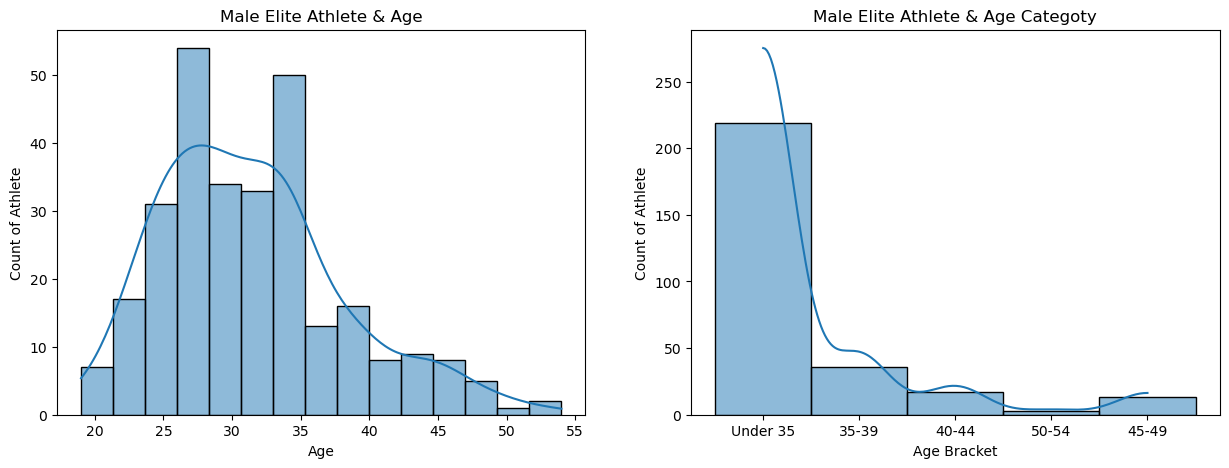

In [85]:
# Male Elite Athlete & Age & Categoty
plt.figure(figsize=(15,5))
plt.subplot(2,2,1)
sns.histplot (data=df_elite_gmi, x= 'Age', kde=True)
plt.ylabel('Count of Athlete')
plt.title('Male Elite Athlete & Age')

plt.subplot(2,2,2)
sns.histplot (data=df_elite_gmi, x= 'Age Bracket', kde=True)
plt.ylabel('Count of Athlete')
plt.title('Male Elite Athlete & Age Categoty')
plt.show()

- In Gender Female, elite athlete:  age under 35 are higher in number .

#### Female Elite 🏃‍♀️🏃‍♀

In [49]:
# Filtering female

df_female = df_age_fil[df_age_fil.Gender== 'F']
 
df_elite_f = pd.pivot_table(data=df_female, index=['Year','Race', 'Gender','Name', 'Time_HMS', 'Age', 'Age Bracket'], values= 'Finish' )
df_elite_f.head()

Finish
Year Race               Gender Name                  Time_HMS   Age Age Bracket        
2010 Air Force Marathon F      ABBY CARRELS          05: 31: 12 24  Under 35      19872
                               ABIGAIL BRANDENBERGER 04: 16: 41 29  Under 35      15401
                               ABIGAIL MARIKIAN      04: 28: 58 24  Under 35      16138
                               ADRIA MERCADER        04: 21: 57 28  Under 35      15717
                               AIDYN IACHINI         05: 43: 42 27  Under 35      20622

In [50]:
# Sort the DataFrame by Year and Finish
df_elite_sort_f= df_elite_f.sort_values(by=['Year', 'Race','Finish'])

# groupby first 3 players
df_elite_gf = df_elite_sort_f.groupby('Race').head(3)

df_elite_gf.head(20)

Finish
Year Race                   Gender Name              Time_HMS   Age Age Bracket        
2010 Air Force Marathon     F      REBECCA MURRAY    03: 01: 07 25  Under 35      10867
                                   ERIN O'MARA       03: 04: 02 26  Under 35      11042
                                   ANNE MARIE SIBAL  03: 06: 47 29  Under 35      11207
     Akron Marathon         F      Ludmila Stepanova 02: 42: 33 26  Under 35       9753
                                   Elena Kaledina    02: 49: 52 43  40-44         10192
                                   Shanna Ailes      02: 53: 53 32  Under 35      10433
     Atlantic City Marathon F      Katie Aldridge    02: 53: 17 36  35-39         10397
                                   Claire Hewitt     03: 03: 40 27  Under 35      11020
                                   Justyna Wilson    03: 08: 07 35  35-39         11287
     Baltimore Marathon     F      OLENA SHURKHNO    02: 32: 17 33  Under 35       9137
                                   IULIIA ARKHIPOVA  02: 33: 52 26  Under 35       9232
                                   NAN KENNARD       02: 35: 49 29  Under 35       9349
     Bay State Marathon     F      CAROLINE BJUNE    02: 49: 14 36  35-39         10154
                                   MARYBETH BAXTER   02: 55: 27 31  Under 35      10527
                                   AMANDA BREWSTER   02: 57: 29 29  Under 35      10649
     Breakers Marathon      F      Michelle Gosselin 03: 05: 30 25  Under 35      11130
                                   Cheryl Edwards    03: 14: 14 41  40-44         11654
                                   Maggie Bradley    03: 20: 00 35  35-39         12000
     Cape Cod Marathon      F      Mary-Lynn Currier 02: 59: 14 49  45-49         10754
                                   Helen Dinan       03: 02: 39 39  35-39         10959

In [51]:
# reset index
df_elite_gfi= df_elite_gf.reset_index()

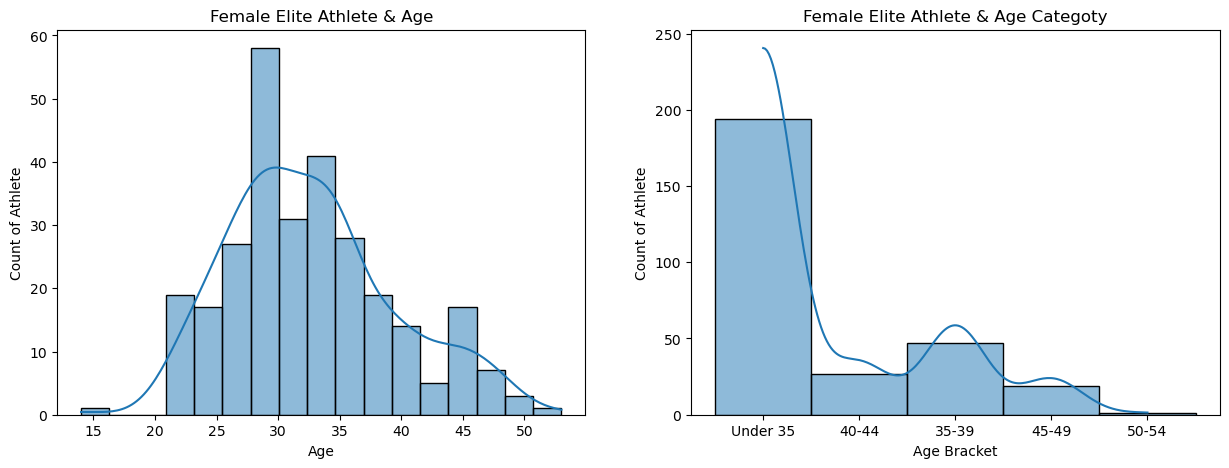

In [88]:
# Female Elite Athlete & Age Categoty
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.histplot (data=df_elite_gfi, x= 'Age', kde=True)
plt.ylabel('Count of Athlete')
plt.title('Female Elite Athlete & Age')
plt.subplot(1,2,2)
sns.histplot (data=df_elite_gfi, x= 'Age Bracket', kde=True)
plt.ylabel('Count of Athlete')
plt.title('Female Elite Athlete & Age Categoty')
plt.show()

- In Gender Female, elite athlete:  age under 35 are higher in number .

In [97]:
df_elite_gmi

,Year,Race,Gender,Name,Time_HMS,Age,Age Bracket,Finish
0,2010,Air Force Marathon,M,BRIAN DUMM,02: 27: 49,27,Under 35,8869
1,2010,Air Force Marathon,M,KOTA REICHERT,02: 28: 33,27,Under 35,8913
2,2010,Air Force Marathon,M,JASON BROSSEAU,02: 33: 26,24,Under 35,9206
3,2010,Akron Marathon,M,Geoffrey Kiprotich,02: 19: 34,31,Under 35,8374
4,2010,Akron Marathon,M,George Towett,02: 19: 35,25,Under 35,8375
...,...,...,...,...,...,...,...,...
283,2019,Brooklyn Marathon,M,SAMMY GOTTS,02: 43: 16,34,Under 35,9796
284,2019,Brooklyn Marathon,M,OZ PEARLMAN,02: 44: 44,34,Under 35,9884
285,2019,Portland Oregon Marathon,M,Kallin Khan,02: 25: 16,22,Under 35,8716
286,2019,Portland Oregon Marathon,M,Kunitaka Imaizumi,02: 46: 07,21,Under 35,9967
